# Exploratory Data Analysis: Bridges in Nepal

**Data**

* **Source**: List of Main Bridges of SRN, harvested from Government of Nepal, Department of Roads, Road Network 
* **Link**: http://bms.softavi.com/dashboard/guest_report_bi
* **Year**: 2017
* **Retrieved**: April 09, 2020
* **Blog**: https://blog.sushilawale.com/exploring-bridges-in-nepal/
* **Published**: April 10, 2020

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

sns.set(style="darkgrid")
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('data.csv', index_col='S.No.')

### Data Preview

In [3]:
df.head()

,Bridge Number,Bridge Name,Road Name,District,River/Stream,Chainage(Km),Length(m),Width(m),Span No,Foundation Type,Loading Capacity,Maintenance Division,Region,Completion Year,Cordinate,Bridge Type,Bridge Condition,Total Score,Load Restriction,Construction Status,Span Length(m),Data Updated Year
S.No.,,,,,,,,,,,,,,,,,,,,,,
1,04-H001-004,Ninda Khola,Mahendra Rajmarga,Jhapa,Ninda,5.46,318.60,RW-7.9 | CW-7,12.0,RCC Foundation,IRC class A/AA,Damak,Eastern,4,26.6602 | 88.1072,RCC T-Beam,5,3.6,0.0,Completed,26.55,2017
2,04-H001-003,Pali,Mahendra Rajmarga,Jhapa,Pali Khola,3.44,49.60,RW-7.8 | CW-7,3.0,Well Foundation,IRC class A/AA,Damak,Eastern,3,26.6505 | 88.1368,RCC T-Beam,7,3.1,0.0,Completed,16.5,2017
3,04-H001-028,Jhiljile,Mahendra Rajmarga,Jhapa,Jhiljhile,36.64,5.75,RW-10.6 | CW-9.8,1.0,Natural Rock,IRC class A/AA,Damak,Eastern,28,26.6433 | 87.8071,RCC Slab,7,3.1,0.0,Completed,5.75,2017
4,04-H001-001,Mechi,Mahendra Rajmarga,Jhapa,Mechi,0.00,583.00,RW-7.86 | CW-7,20.0,RCC Foundation,IRC class A/AA,Damak,Eastern,1,26.6440 | 88.1638,RCC T-Beam,6,2.7,0.0,Completed,29.15,2017
5,04-H001-031,Chyangri,Mahendra Rajmarga,Jhapa,Chyangri,42.25,6.70,RW-10.6 | CW-9.7,1.0,Natural Rock,NaN,Damak,Eastern,31,26.6494 | 87.7619,RCC Slab,7,3.6,0.0,Completed,6.7,2017


### Renaming and Droping Columns

In [4]:
df.columns

Index(['Bridge Number', 'Bridge Name', 'Road Name', 'District', 'River/Stream',
       'Chainage(Km)', 'Length(m)', 'Width(m)', 'Span No', 'Foundation Type',
       'Loading Capacity', 'Maintenance Division', 'Region', 'Completion Year',
       'Cordinate', 'Bridge Type', 'Bridge Condition', 'Total Score',
       'Load Restriction', 'Construction Status', 'Span Length(m)',
       'Data Updated Year'],
      dtype='object')

In [5]:
def format_column(col):
    col = col.lower()
    col = col.replace(")","")
    col = re.sub(r'[/(\s+]', '_', col)
    return col

In [6]:
df.columns = [format_column(col) for col in df]
df.columns

Index(['bridge_number', 'bridge_name', 'road_name', 'district', 'river_stream',
       'chainage_km', 'length_m', 'width_m', 'span_no', 'foundation_type',
       'loading_capacity', 'maintenance_division', 'region', 'completion_year',
       'cordinate', 'bridge_type', 'bridge_condition', 'total_score',
       'load_restriction', 'construction_status', 'span_length_m',
       'data_updated_year'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1932 entries, 1 to 1932
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bridge_number         1932 non-null   object 
 1   bridge_name           1932 non-null   object 
 2   road_name             1932 non-null   object 
 3   district              1932 non-null   object 
 4   river_stream          1932 non-null   object 
 5   chainage_km           1932 non-null   float64
 6   length_m              1932 non-null   float64
 7   width_m               1932 non-null   object 
 8   span_no               1875 non-null   float64
 9   foundation_type       1721 non-null   object 
 10  loading_capacity      496 non-null    object 
 11  maintenance_division  1909 non-null   object 
 12  region                1932 non-null   object 
 13  completion_year       1932 non-null   int64  
 14  cordinate             1932 non-null   object 
 15  bridge_type          

In [8]:
df.drop(['bridge_number','chainage_km','width_m','span_no','foundation_type','loading_capacity','maintenance_division','completion_year','cordinate','total_score','load_restriction','span_length_m','data_updated_year'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1932 entries, 1 to 1932
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bridge_name          1932 non-null   object 
 1   road_name            1932 non-null   object 
 2   district             1932 non-null   object 
 3   river_stream         1932 non-null   object 
 4   length_m             1932 non-null   float64
 5   region               1932 non-null   object 
 6   bridge_type          1875 non-null   object 
 7   bridge_condition     1932 non-null   int64  
 8   construction_status  1932 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 150.9+ KB


# Data Exploration

## A. Frequency Statistics

### 1. Count of bridges by region

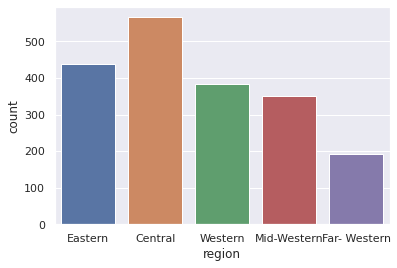

In [9]:
sns.countplot(x='region', data=df)

### 2. Count of bridges by type

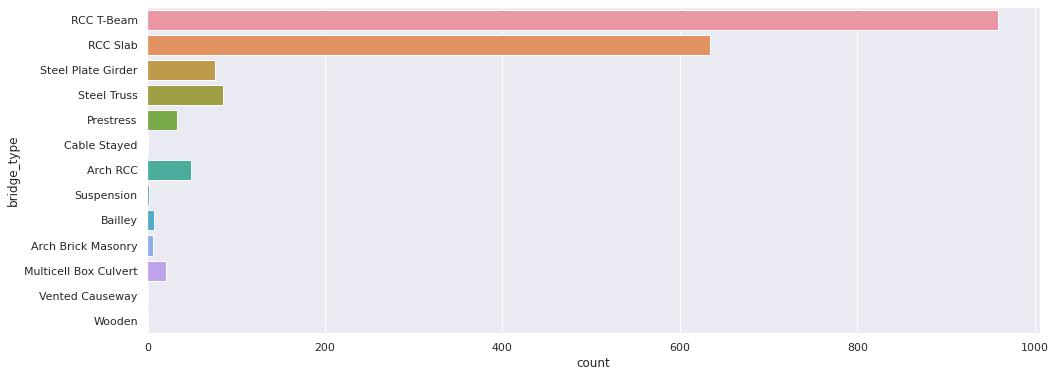

In [10]:
plt.figure(figsize=(16, 6))
sns.countplot(y='bridge_type', data=df)

### 3. Count of RCC T-Beam bridges by region

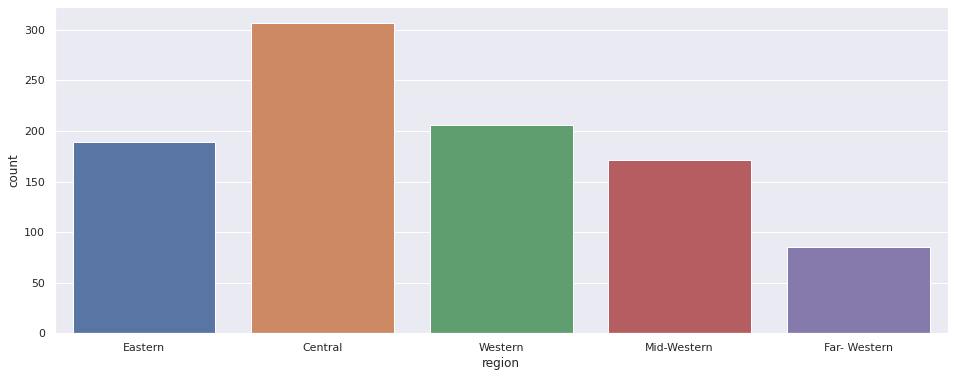

In [11]:
plt.figure(figsize=(16, 6))
sns.countplot(x='region', data=df[df.bridge_type == 'RCC T-Beam'])

### 4. Count of bridges by district

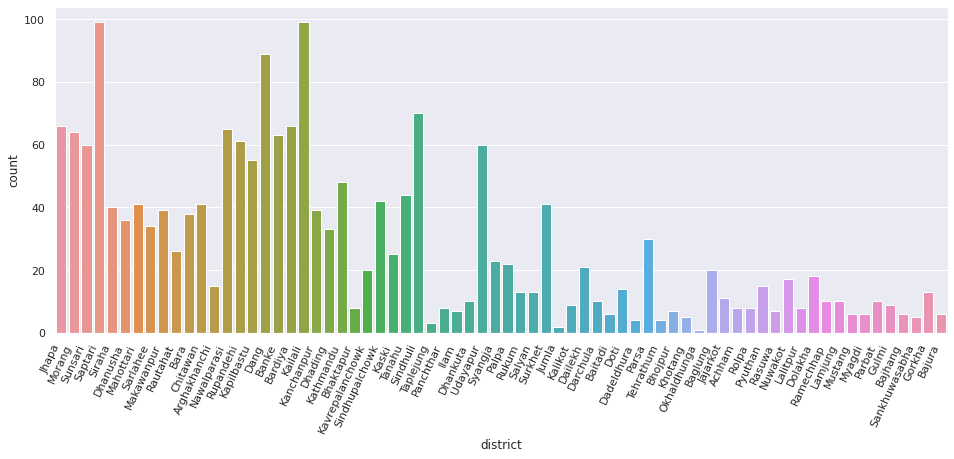

In [12]:
plt.figure(figsize=(16, 6))
fig = sns.countplot(x='district', data=df)
plt.xticks(rotation = 65, horizontalalignment='right')
plt.show()

In [13]:
df.district.value_counts()

Saptari        99
Kailali        99
Dang           89
Sindhuli       70
Bardiya        66
               ..
Tehrathum       4
Dadeldhura      4
Taplejung       3
Jumla           2
Okhaldhunga     1
Name: district, Length: 70, dtype: int64

**Saptari** and **Kailali** districts have the highest number of bridges i.e. *99* whereas **Okhaldhunga** district only has *1*.

### 5. Count of different types of bridges in Saptari district

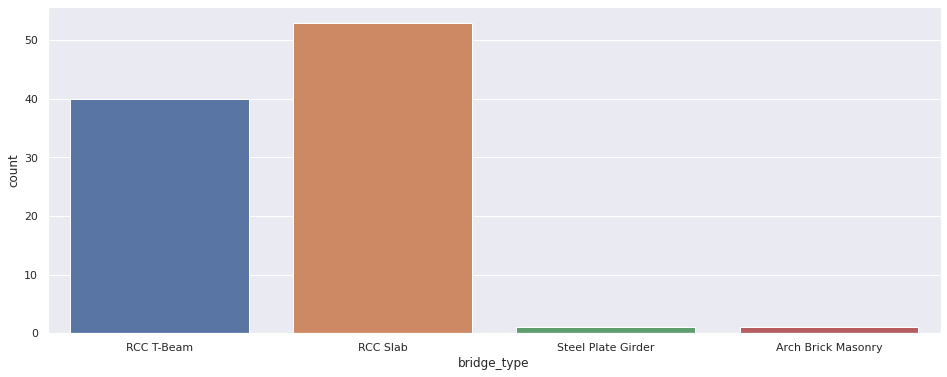

In [14]:
plt.figure(figsize=(16, 6))
sns.countplot(x='bridge_type', data=df[df.district == 'Saptari'])

### 6. Count of bridges in my hometown, Lalitpur

In [15]:
df[df.district == 'Lalitpur'].district.value_counts()

Lalitpur    8
Name: district, dtype: int64

### 7. Count of bridges by construction status

In [16]:
df.construction_status.value_counts()

Completed             1724
Under Construction     208
Name: construction_status, dtype: int64

### 8. Count of completed bridges by condition

*Condition Scale (0-10)*

* 0 - Critical Condition- Facility is Closed and Is Beyond Repair
* 1 - Critical condition - facility is closed. Study should the feasibility for repair
* 2 - Critical condition - need for repair or rehabilitation urgent. Facility should be closed until the indicated repair is completed
* 3 - Poor condition— repair or rehabilitation required immediately
* 4 - Marginal condition—potential exists for major rehabilitation
* 5 - Generally fair condition—potential exists for minor rehabilitation
* 6 - Fair condition—potential exists for major maintenance
* 7 - Generally good condition—potential exists for minor maintenance
* 8 - Good condition—no repairs needed
* 9 - New Condition
* 10 - Not Applicable

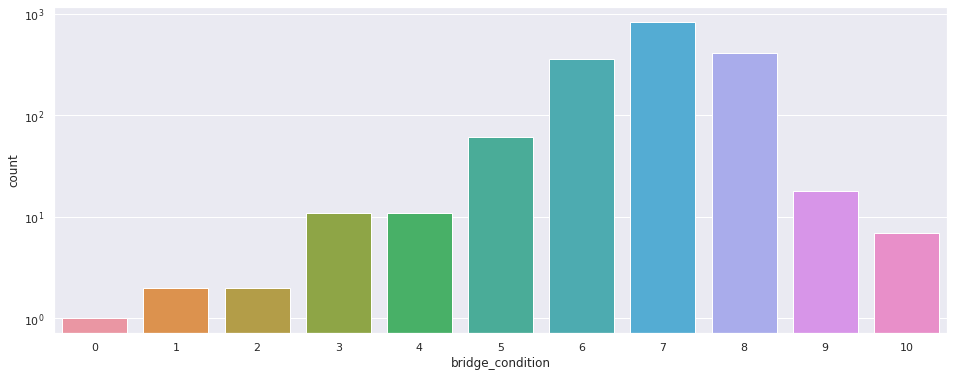

In [17]:
plt.figure(figsize=(16, 6))
sns.countplot(x='bridge_condition', data=df[df.construction_status == 'Completed'], log=True)

## B. Descriptive Statistics

### 1. Data Info

In [18]:
df.describe()

,length_m,bridge_condition
count,1932.000000,1932.000000
mean,45.580683,7.237060
std,76.682149,1.300804
min,0.000000,0.000000
25%,12.000000,7.000000
50%,24.000000,7.000000
75%,50.000000,8.000000
max,1149.000000,10.000000


In [19]:
# Replacing rows with value 0 with NaN
df = df.replace(0.0, np.NaN)
df.describe()

,length_m,bridge_condition
count,1925.000000,1932.000000
mean,45.746431,7.237060
std,76.772124,1.300804
min,5.550000,0.000000
25%,12.000000,7.000000
50%,24.000000,7.000000
75%,50.000000,8.000000
max,1149.000000,10.000000


The average length of bridges in ~*46* meters.

The average condition of the bridges is a *7* i.e. they are in good condition.

The length of the bridges range from *5.5* m to *1149* m.

### 2. Longest and Shortest Bridge

In [20]:
df[df.length_m == 1149]

,bridge_name,road_name,district,river_stream,length_m,region,bridge_type,bridge_condition,construction_status
S.No.,,,,,,,,,
97,Koshi Barrage,Mahendra Rajmarga,Saptari,Koshi Barrage,1149.0,Eastern,RCC T-Beam,10,Completed


The **Koshi Barrage** bridge in **Saptari** district is the longest one with a length of *1149* meters.

In [21]:
df[df.length_m == 5.55]

,bridge_name,road_name,district,river_stream,length_m,region,bridge_type,bridge_condition,construction_status
S.No.,,,,,,,,,
1817,Ankuse khola,Janakpur Circumambulatory,Mahottari,Ankuse khola,5.55,Central,RCC Slab,7,Completed


The **Ankuse Khola** bridge in **Mahottari** district is the shortest one with a length of *5.5* meters.

### 3. Total bridges with length above 100 m

In [22]:
df[df.length_m > 100].shape[0]

176

### 4. Top 10 Longest and Shortest
#### a. Top 10 Longest

In [23]:
df.sort_values(by=['length_m'], ascending=False).head(10)

,bridge_name,road_name,district,river_stream,length_m,region,bridge_type,bridge_condition,construction_status
S.No.,,,,,,,,,
97,Koshi Barrage,Mahendra Rajmarga,Saptari,Koshi Barrage,1149.0,Eastern,RCC T-Beam,10,Completed
75,Mahuli,Mahendra Rajmarga,Saptari,Mahuli - 1,1100.0,Eastern,RCC Slab,8,Completed
1013,Karnali (Geruwa) Bridge,Postal Highway,Bardiya,Geruwa Khola,1015.0,Mid-Western,RCC T-Beam,9,Completed
866,Thulo mai,Postal Highway,Jhapa,Thulo mai khola,800.0,Eastern,NaN,10,Under Construction
11,Kankai,Mahendra Rajmarga,Jhapa,Kankai,702.0,Eastern,RCC T-Beam,7,Completed
123,Kamala,Mahendra Rajmarga,Siraha,Kamala,640.0,Eastern,RCC T-Beam,8,Completed
926,Bagmati,Postal Highway,Rautahat,Bagmati river,633.0,Central,RCC T-Beam,10,Under Construction
20,Ratuwa,Mahendra Rajmarga,Jhapa,Ratuwa,585.0,Eastern,RCC T-Beam,6,Completed
4,Mechi,Mahendra Rajmarga,Jhapa,Mechi,583.0,Eastern,RCC T-Beam,6,Completed


#### b. Top 10 Longest Completed 

In [24]:
df_sorted_length = df[df.construction_status == 'Completed'].sort_values(by=['length_m'], ascending=False)
df_sorted_length.head(10)

,bridge_name,road_name,district,river_stream,length_m,region,bridge_type,bridge_condition,construction_status
S.No.,,,,,,,,,
97,Koshi Barrage,Mahendra Rajmarga,Saptari,Koshi Barrage,1149.00,Eastern,RCC T-Beam,10,Completed
75,Mahuli,Mahendra Rajmarga,Saptari,Mahuli - 1,1100.00,Eastern,RCC Slab,8,Completed
1013,Karnali (Geruwa) Bridge,Postal Highway,Bardiya,Geruwa Khola,1015.00,Mid-Western,RCC T-Beam,9,Completed
11,Kankai,Mahendra Rajmarga,Jhapa,Kankai,702.00,Eastern,RCC T-Beam,7,Completed
123,Kamala,Mahendra Rajmarga,Siraha,Kamala,640.00,Eastern,RCC T-Beam,8,Completed
20,Ratuwa,Mahendra Rajmarga,Jhapa,Ratuwa,585.00,Eastern,RCC T-Beam,6,Completed
4,Mechi,Mahendra Rajmarga,Jhapa,Mechi,583.00,Eastern,RCC T-Beam,6,Completed
1019,Karnali(satighat pul),Postal Highway,Kailali,Karnali(satighat pul),531.00,Far- Western,RCC T-Beam,8,Completed
394,Karnali,Mahendra Rajmarga,Bardiya,Karnali,500.00,Mid-Western,Cable Stayed,7,Completed


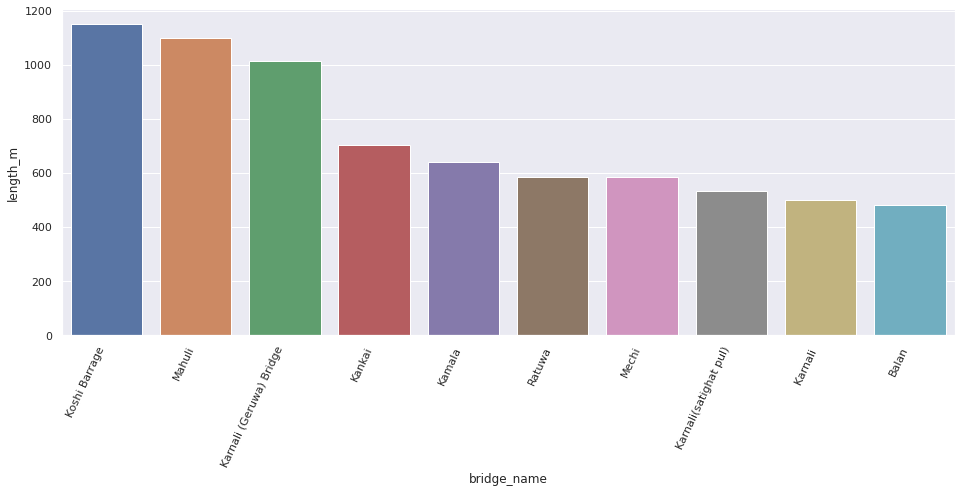

In [25]:
plt.figure(figsize=(16, 6))
fig = sns.barplot(x="bridge_name", y="length_m", data=df_sorted_length.head(10))
plt.xticks(rotation = 65, horizontalalignment='right')
plt.show()

#### c. Top 10 Shortest

In [26]:
df_sorted_length.tail(10).sort_values(by=['length_m'])

,bridge_name,road_name,district,river_stream,length_m,region,bridge_type,bridge_condition,construction_status
S.No.,,,,,,,,,
1817,Ankuse khola,Janakpur Circumambulatory,Mahottari,Ankuse khola,5.55,Central,RCC Slab,7,Completed
1809,Odigad Khola,Nagma - Gamgadhi,Jumla,Odigad Khola,5.65,Mid-Western,RCC Slab,7,Completed
3,Jhiljile,Mahendra Rajmarga,Jhapa,Jhiljhile,5.75,Eastern,RCC Slab,7,Completed
738,Aringale (Muru) Khola,Rapti Highway,Rukum,Aringale (Muru) Khola,5.90,Mid-Western,RCC Slab,7,Completed
928,Maraha,Postal Highway,Rautahat,Maraha khola,6.00,Central,Arch Brick Masonry,7,Completed
1382,gharamadi khola,Pokhara - Baglung - Beni - Jomsom,Myagdi,Gharamdi Khola,6.00,Western,RCC Slab,7,Completed
1371,Phedi Khola,Pokhara - Baglung - Beni - Jomsom,Kaski,Phedi khola,6.00,Western,RCC Slab,7,Completed
1387,Bhadra (Bhyaple) khola,Pokhara - Baglung - Beni - Jomsom,Parbat,Bhadra (Bhyaple) khola,6.00,Western,RCC Slab,6,Completed
884,Larikatta,Postal Highway,Morang,Larikatta,6.05,Eastern,RCC Slab,6,Completed


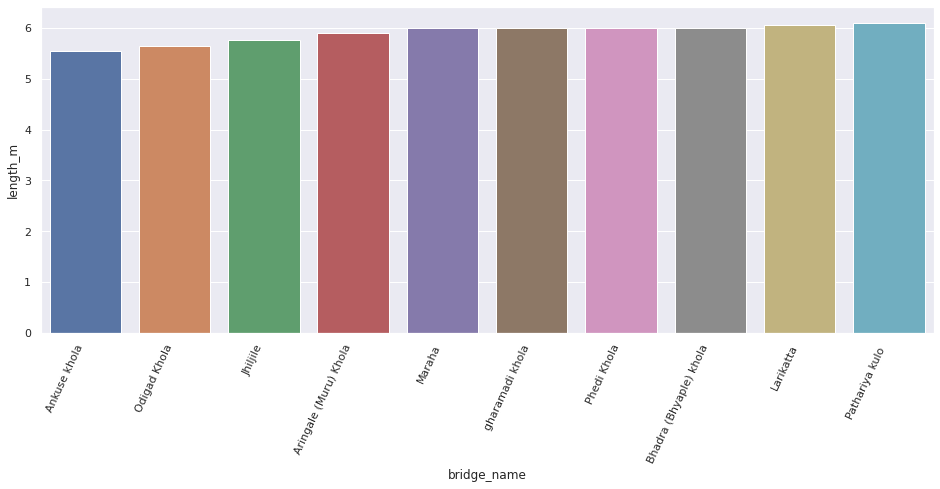

In [27]:
plt.figure(figsize=(16, 6))
fig = sns.barplot(x="bridge_name", y="length_m", data=df_sorted_length.tail(10).sort_values(by=['length_m']))
plt.xticks(rotation = 65, horizontalalignment='right')
plt.show()

### 5. Districts with the most longest bridges in top 100

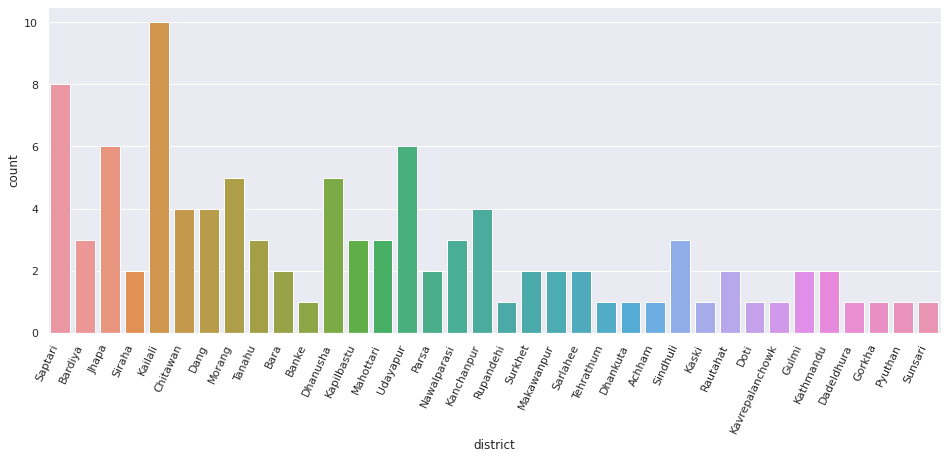

In [28]:
plt.figure(figsize=(16, 6))
fig = sns.countplot(x='district', data=df_sorted_length.head(100))
plt.xticks(rotation = 65, horizontalalignment='right')
plt.show()

### 6. Districts with the most bridges above 100m

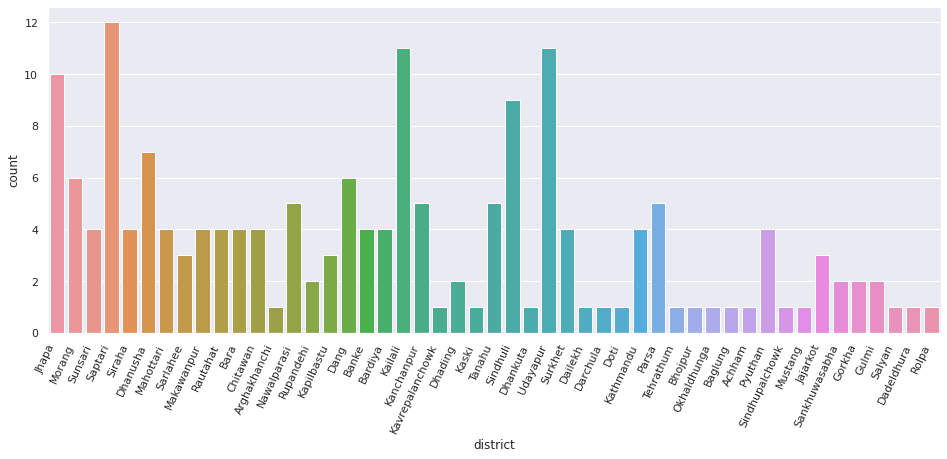

In [29]:
plt.figure(figsize=(16, 6))
fig = sns.countplot(x='district', data=df[df.length_m > 100])
plt.xticks(rotation = 65, horizontalalignment='right')
plt.show()

### 7. Road with the most bridges above 100m

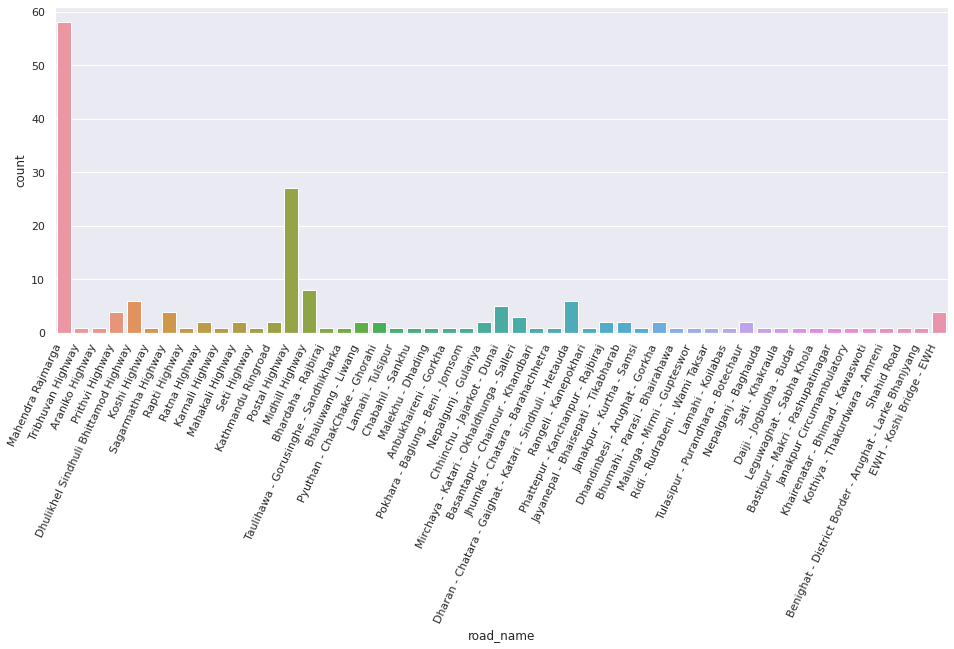

In [30]:
plt.figure(figsize=(16, 6))
fig = sns.countplot(x='road_name', data=df[df.length_m > 100])
plt.xticks(rotation = 65, horizontalalignment='right')
plt.show()

### 8. Bridge type with the most bridges above 100m

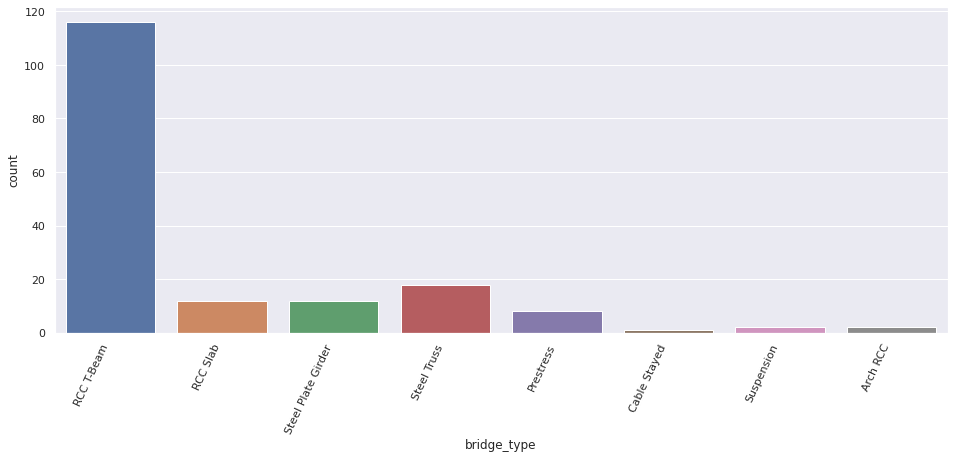

In [31]:
plt.figure(figsize=(16, 6))
fig = sns.countplot(x='bridge_type', data=df[df.length_m > 100])
plt.xticks(rotation = 65, horizontalalignment='right')
plt.show()

### 9. Total length of all the bridges (in m)

In [32]:
df.length_m.sum()

88061.87999999999

### 10. Total length of all the bridges by district (in m)

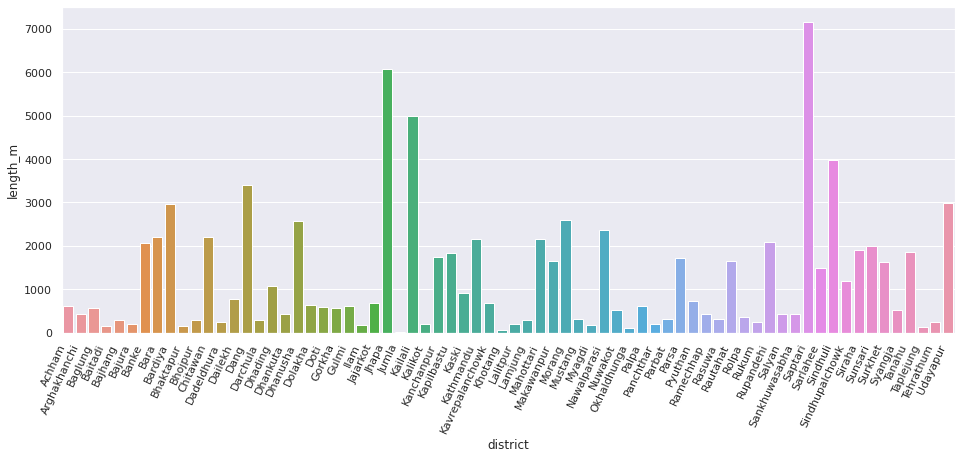

In [33]:
plt.figure(figsize=(16, 6))
fig = sns.barplot(x='district',y='length_m', data=df.groupby(df.district, as_index=False).sum())
plt.xticks(rotation = 65, horizontalalignment='right')
plt.show()

### 11. Top 10 districts with most bridge length

In [34]:
df.groupby(df.district, as_index=False).length_m.sum().sort_values(by=['length_m'], ascending=False).head(10)

,district,length_m
58,Saptari,7150.47
25,Jhapa,6072.39
27,Kailali,4996.96
60,Sindhuli,3975.85
14,Dang,3409.60
69,Udayapur,2987.08
8,Bardiya,2967.20
39,Morang,2607.46
18,Dhanusha,2583.90
42,Nawalparasi,2376.31


### 12. Longest bridge of each district

In [35]:
pd.set_option('display.max_rows', None)
df.loc[df.groupby('district')['length_m'].idxmax()].sort_values(by='district')[['district','bridge_name','length_m']]

,district,bridge_name,length_m
S.No.,,,
1123,Achham,Karnali,200.00
213,Arghakhanchi,Rana Sing,103.20
1089,Baglung,Kaligandaki pul,114.00
831,Baitadi,Surnaya Gad River,41.00
1459,Bajhang,Bhahuligad,77.00
1787,Bajura,Gui Gad River,61.00
1778,Banke,Rapti Khola,342.00
195,Bara,Bakeya,355.59
1013,Bardiya,Karnali (Geruwa) Bridge,1015.00


In [36]:
df.corr()

,length_m,bridge_condition
length_m,1.000000,0.080434
bridge_condition,0.080434,1.000000
